In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Leer datos desde el archivo results.csv
print(os.getcwd())
file_name = 'blackscholes_1_2.csv'
file_path = '../result/blackscholes_1_3.csv'
df = pd.read_csv(file_path)
print(df.head())

/home/danielcatu/documents/tesis/project/test
   num_invocation  current_num_invocation  wait_time  elapsed_time  real_time  \
0               1                       1  30.298112     55.644736     53.716   
1               1                       1  30.298112     55.644736     53.716   
2               1                       1  30.298112     55.644736     53.716   
3               1                       1  30.298112     55.644736     53.716   
4               1                       1  30.298112     55.644736     53.716   

   user_time  cpu_usage  memory_usage     timestamp  current_minute  
0      53.33   0.020200   607039488.0  1.701360e+09               1  
1      53.33   0.020200   607039488.0  1.701360e+09               1  
2      53.33   0.020200   607039488.0  1.701360e+09               1  
3      53.33   0.020200   607039488.0  1.701360e+09               1  
4      53.33   0.383159   607039488.0  1.701360e+09               1  


In [23]:
df.size

2020

In [24]:
# Drop the index column
# df = df.drop(columns=['Unnamed: 0'])

In [4]:
from sklearn.model_selection import train_test_split

# Separar los conjuntos de características (X) y variable objetivo (y)
X = df.drop(columns=['cpu_usage', 'memory_usage'])  # Características
y_cpu = df['cpu_usage']  # Variable objetivo para CPU
y_memory = df['memory_usage']  # Variable objetivo para memoria

# Dividir los datos en conjuntos de entrenamiento y prueba para CPU
X_train_cpu, X_test_cpu, y_train_cpu, y_test_cpu = train_test_split(X, y_cpu, test_size=0.2, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba para memoria
X_train_memory, X_test_memory, y_train_memory, y_test_memory = train_test_split(X, y_memory, test_size=0.2, random_state=42)


In [5]:
cov_matrix = df.cov()

print("Matriz de Covarianza:")
cov_matrix

Matriz de Covarianza:


,num_invocation,current_num_invocation,wait_time,elapsed_time,real_time,user_time,cpu_usage,memory_usage,timestamp,current_minute
num_invocation,4.538917e-01,1.568234e-01,2.943508e+00,6.789728e+00,6.729803e+00,1.128335e+00,3.275424e-02,1.637633e+08,1.345872e+01,4.792914e-02
current_num_invocation,1.568234e-01,3.169690e-01,7.175804e-01,1.465753e+01,1.463048e+01,2.276590e+00,4.998169e-02,2.814815e+08,2.690087e+01,1.278493e-01
wait_time,2.943508e+00,7.175804e-01,3.077982e+02,-4.786899e+01,-4.884316e+01,9.243078e+00,-5.699790e-01,1.812855e+09,-2.249679e+03,-1.783371e+01
elapsed_time,6.789728e+00,1.465753e+01,-4.786899e+01,1.915137e+03,1.912058e+03,1.659854e+02,-2.699783e-01,2.257130e+10,2.086648e+04,1.453386e+02
real_time,6.729803e+00,1.463048e+01,-4.884316e+01,1.912058e+03,1.909108e+03,1.657630e+02,-2.697789e-01,2.253298e+10,2.083773e+04,1.451336e+02
user_time,1.128335e+00,2.276590e+00,9.243078e+00,1.659854e+02,1.657630e+02,2.294326e+01,2.375333e-01,2.582456e+09,1.268216e+03,8.289906e+00
cpu_usage,3.275424e-02,4.998169e-02,-5.699790e-01,-2.699783e-01,-2.697789e-01,2.375333e-01,1.216442e-01,6.156361e+07,-3.349431e+01,-2.618921e-01
memory_usage,1.637633e+08,2.814815e+08,1.812855e+09,2.257130e+10,2.253298e+10,2.582456e+09,6.156361e+07,1.165625e+18,1.785515e+11,1.048411e+09
timestamp,1.345872e+01,2.690087e+01,-2.249679e+03,2.086648e+04,2.083773e+04,1.268216e+03,-3.349431e+01,1.785515e+11,6.855689e+05,4.677243e+03
current_minute,4.792914e-02,1.278493e-01,-1.783371e+01,1.453386e+02,1.451336e+02,8.289906e+00,-2.618921e-01,1.048411e+09,4.677243e+03,3.211302e+01


In [27]:
df.head()

,num_invocation,current_num_invocation,wait_time,elapsed_time,real_time,user_time,cpu_usage,memory_usage,timestamp,current_minute
0,1,5,18.578642,60.961074,60.120,59.825,2.813622,2.188837e+09,1.700790e+09,1
1,4,5,22.754974,65.619410,64.720,60.195,2.813622,3.666592e+09,1.700790e+09,1
2,4,5,22.754974,65.619410,64.720,60.195,2.813622,3.666592e+09,1.700790e+09,1
3,4,5,22.754974,65.619410,64.720,60.195,2.813622,3.666592e+09,1.700790e+09,1
4,2,5,28.893084,64.964483,63.916,63.449,2.813622,3.666592e+09,1.700790e+09,1


In [6]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Create a random forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=0)

X = df.drop(columns=['cpu_usage'])
y = df['cpu_usage']

# Train the model using the training sets
model.fit(X, y)

# Get the importance of the resulting features
feature_importance = model.feature_importances_

# Obtener los nombres de las características originales
feature_names = X.columns

# Crear un DataFrame con la importancia de las características junto con sus nombres
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Ordenar por importancia de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame con la importancia de las características
feature_importance_df

,Feature,Importance
6,memory_usage,0.414153
2,wait_time,0.254092
7,timestamp,0.091960
1,current_num_invocation,0.046723
4,real_time,0.045992
5,user_time,0.045945
8,current_minute,0.042571
3,elapsed_time,0.040907
0,num_invocation,0.017656


In [7]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Create a random forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=0)

X = df.drop(columns=['memory_usage'])
y = df['memory_usage']

# Train the model using the training sets
model.fit(X, y)

# Get the importance of the resulting features
feature_importance = model.feature_importances_

# Obtener los nombres de las características originales
feature_names = X.columns

# Crear un DataFrame con la importancia de las características junto con sus nombres
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Ordenar por importancia de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame con la importancia de las características
feature_importance_df

,Feature,Importance
6,cpu_usage,0.587583
5,user_time,0.164478
4,real_time,0.070555
7,timestamp,0.067816
3,elapsed_time,0.048777
2,wait_time,0.025255
8,current_minute,0.022774
1,current_num_invocation,0.006721
0,num_invocation,0.006040


In [3]:
# Bayesian Optimization
from bayes_opt import BayesianOptimization
import numpy as np
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events

logger_folder = '../log'
max_iterations = 10
start_iteration = 10


X_real_time = df[['cpu_usage',
               'memory_usage']]
y_real_time = df['real_time']


def objective_function_for_real_time(cpu_usage, memory_usage):
    x = np.array([-1*int(cpu_usage), int(-1*memory_usage)])
    closest_row_index = np.abs(np.abs(X_real_time - x)).sum(axis=1).argmin()

    return y_real_time[closest_row_index]


pbounds_for_real_time = {'cpu_usage': (0, df['cpu_usage'].max()), 'memory_usage': (
    0, df['memory_usage'].max())}

optimizer_real_time = BayesianOptimization(
    f=objective_function_for_real_time,
    pbounds=pbounds_for_real_time,
    random_state=1,
)

logger_real_time = JSONLogger(
    path=f"{logger_folder}/{file_name}_for2_real_time.json")
optimizer_real_time.subscribe(Events.OPTIMIZATION_STEP, logger_real_time)


last_max = None
i = start_iteration
while i <= max_iterations:
    optimizer_real_time.maximize(
        init_points=1,
        n_iter=i,
    )
    if (last_max == None):
        last_max = optimizer_real_time.max['target']
    elif last_max - optimizer_real_time.max['target'] < error:
        break
    last_max = optimizer_real_time.max['target']
    i += 1
    print('i: ', i)

# Obtener los resultados de la búsqueda
optimizer_real_time.max['params']

i:  6


{'cpu_usage': 2.925585955768065, 'memory_usage': 7234834655.592164}

In [17]:

X_real_time = df[['cpu_usage',
               'memory_usage']]
y_real_time = df['real_time']


def objective_function_for_real_time(cpu_usage, memory_usage):
    x = np.array([-1*int(cpu_usage), int(-1*memory_usage)])
    closest_row_index = np.abs(np.abs(X_real_time - x)).sum(axis=1).argmin()

    return y_real_time[closest_row_index]


pbounds_for_real_time = {'cpu_usage': (0, df['cpu_usage'].max()), 'memory_usage': (
    0, df['memory_usage'].max())}

optimizer_real_time = BayesianOptimization(
    f=objective_function_for_real_time,
    pbounds=pbounds_for_real_time,
    random_state=1,
)

logger_real_time = JSONLogger(
    path=f"{logger_folder}/{file_name}_for_real_time.json")
optimizer_real_time.subscribe(Events.OPTIMIZATION_STEP, logger_real_time)


last_max = None
i = start_iteration
while i <= max_iterations:
    optimizer_real_time.maximize(
        init_points=1,
        n_iter=i,
    )
    if (last_max == None):
        last_max = optimizer_real_time.max['target']
    elif last_max - optimizer_real_time.max['target'] < error:
        break
    last_max = optimizer_real_time.max['target']
    i += 1
    print('i: ', i)

# Obtener los resultados de la búsqueda
print(optimizer_real_time.max)

   cpu_usage  memory_usage
0   0.999666  1.010569e+09
1   0.999666  1.010569e+09
2   0.999666  1.010569e+09
3   0.999666  1.010569e+09
4   1.002080  1.010569e+09
i:  6
{}
{'target': 64.661, 'params': {'cpu_usage': 1.128950238405146, 'memory_usage': 2676293392.431156}}


In [31]:
import request_prometheus as req
import resource_manage as resource_manage

resource_manage.load_and_save_yaml(
    "function", str(optimizer_cpu.max['target']*1000) + 'm', str(optimizer_memory.max['target']/(1024*1024)) + 'Mi')
resource_manage.apply_yaml("function")

Error al aplicar el archivo YAML function: Error: Get "https://127.0.0.1:39627/apis/serving.knative.dev/v1/namespaces/blackscholes/services/blackscholes": dial tcp 127.0.0.1:39627: connect: connection refused
Run 'kn --help' for usage



In [32]:
# validate accuracy
from sklearn.metrics import mean_squared_error
from math import sqrt

# Obtener los mejores parámetros encontrados

optimizer_cpu
optimizer_memory

In [33]:
# Crear gráficas
plt.figure(figsize=(16, 8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

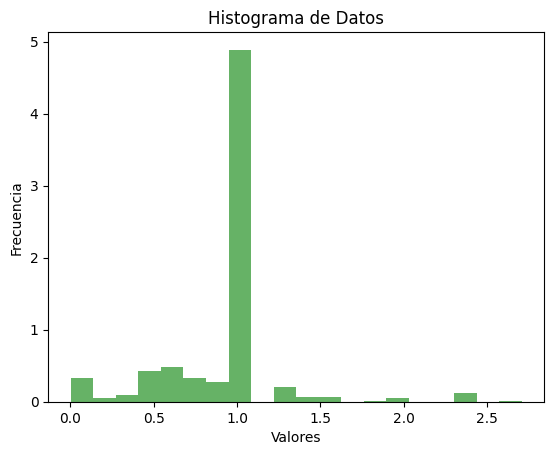

Text(0.5, 1.0, 'Tiempo real vs CPU promedio')

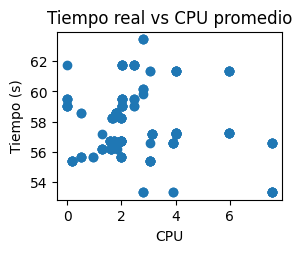

In [34]:
# Gráfico de dispersión para la CPU promedio (avg_cpu_usage) por número de invocación
plt.subplot(2, 2, 1)
plt.plot(df['cpu_usage'], df['user_time'], 'o')
plt.ylabel('Tiempo (s)')
plt.xlabel('CPU')
plt.title('Tiempo real vs CPU promedio')

Text(0, 0.5, 'CPU (%)')

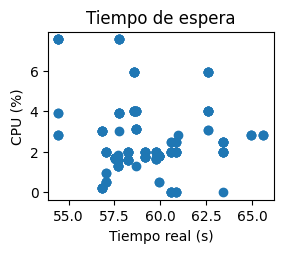

In [35]:
# avg_cpu_usage por número de invocación
plt.subplot(2, 2, 1)
plt.plot(df['elapsed_time'], df['cpu_usage'], 'o')
plt.title('Tiempo de espera')
plt.xlabel('Tiempo real (s)')
plt.ylabel('CPU (%)')


Text(0, 0.5, 'Tiempo de espera')

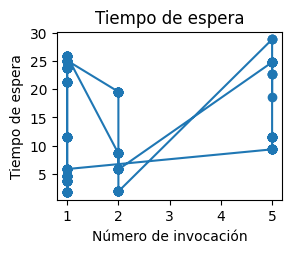

In [36]:
# Gráfica de espera (wait_time)
plt.subplot(2, 2, 1)
plt.plot(df['current_num_invocation'], df['wait_time'], marker='o')
plt.title('Tiempo de espera')
plt.xlabel('Número de invocación')
plt.ylabel('Tiempo de espera')

Text(0, 0.5, 'Tiempo de espera')

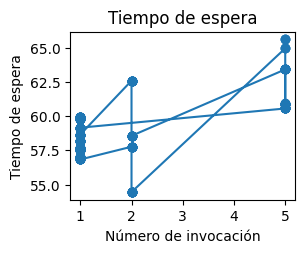

In [37]:
# Gráfica de espera (wait_time)
plt.subplot(2, 2, 1)
plt.plot(df['current_num_invocation'], df['elapsed_time'], marker='o')
plt.title('Tiempo de espera')
plt.xlabel('Número de invocación')
plt.ylabel('Tiempo de espera')

Text(0, 0.5, 'Tiempo transcurrido')

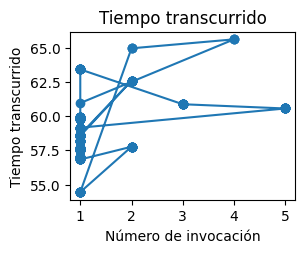

In [38]:
# Gráfica de tiempo transcurrido (elapsed_time)
plt.subplot(2, 2, 2)
plt.plot(df['num_invocation'], df['elapsed_time'], marker='o')
plt.title('Tiempo transcurrido')
plt.xlabel('Número de invocación')
plt.ylabel('Tiempo transcurrido')

Text(0, 0.5, 'Tiempo real')

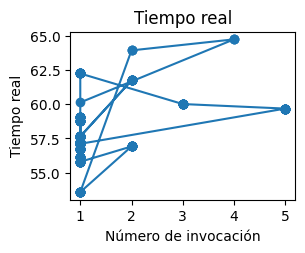

In [39]:
# Gráfica de tiempo real (real_time)
plt.subplot(2, 2, 3)
plt.plot(df['num_invocation'], df['real_time'], marker='o')
plt.title('Tiempo real')
plt.xlabel('Número de invocación')
plt.ylabel('Tiempo real')

Text(0, 0.5, 'Tiempo de usuario')

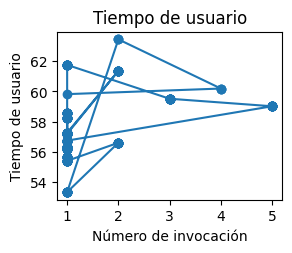

In [40]:
# Gráfica de tiempo de usuario (user_time)
plt.subplot(2, 2, 4)
plt.plot(df['num_invocation'], df['user_time'], marker='o')
plt.title('Tiempo de usuario')
plt.xlabel('Número de invocación')
plt.ylabel('Tiempo de usuario')

In [41]:

# Ajustar el diseño
plt.tight_layout()

<Figure size 640x480 with 0 Axes>